# Data z pd pyth3 df do sqlite3

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import string as st
import datetime
import seaborn as sns

C:\Users\cerny\AppData\Local\Temp\ipykernel_20244\612956766.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
con = sqlite3.connect(':memory:')

In [3]:
np.random.seed(42)
data = np.random.randint(1, 100, size = (1000, 5))
data

array([[52, 93, 15, 72, 61],
       [21, 83, 87, 75, 75],
       [88, 24,  3, 22, 53],
       ...,
       [94, 22, 33, 30, 81],
       [32, 42, 78, 10, 36],
       [34, 73, 28, 11, 78]])

In [4]:
data.shape

(1000, 5)

In [5]:
data.size

5000

In [6]:
data.dtype

dtype('int32')

In [7]:
st.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [8]:
numCols=data.shape[1]
abc=list(st.ascii_uppercase[:numCols])
abc

['A', 'B', 'C', 'D', 'E']

In [9]:
i = pd.date_range(start=datetime.datetime.now().date(), periods=data.shape[0], freq='D')
i

DatetimeIndex(['2025-03-09', '2025-03-10', '2025-03-11', '2025-03-12',
               '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16',
               '2025-03-17', '2025-03-18',
               ...
               '2027-11-24', '2027-11-25', '2027-11-26', '2027-11-27',
               '2027-11-28', '2027-11-29', '2027-11-30', '2027-12-01',
               '2027-12-02', '2027-12-03'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [10]:
df = pd.DataFrame(data, columns = abc, index = i)
df

,A,B,C,D,E
2025-03-09,52,93,15,72,61
2025-03-10,21,83,87,75,75
2025-03-11,88,24,3,22,53
2025-03-12,2,88,30,38,2
2025-03-13,64,60,21,33,76
...,...,...,...,...,...
2027-11-29,13,32,46,23,45
2027-11-30,17,85,66,6,18
2027-12-01,94,22,33,30,81
2027-12-02,32,42,78,10,36


In [11]:
df.to_sql(con=con, name='Moje1', if_exists='replace')

1000

In [28]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-09 00:00:00', 52, 93, 15, 72, 61),
 ('2025-03-10 00:00:00', 21, 83, 87, 75, 75),
 ('2025-03-11 00:00:00', 88, 24, 3, 22, 53),
 ('2025-03-12 00:00:00', 2, 88, 30, 38, 2),
 ('2025-03-13 00:00:00', 64, 60, 21, 33, 76),
 ('2025-03-14 00:00:00', 58, 22, 89, 49, 91),
 ('2025-03-15 00:00:00', 59, 42, 92, 60, 80),
 ('2025-03-16 00:00:00', 15, 62, 62, 47, 62),
 ('2025-03-17 00:00:00', 51, 55, 64, 3, 51),
 ('2025-03-18 00:00:00', 7, 21, 73, 39, 18)]

In [13]:
df = pd.read_sql(con=con, sql='select * from Moje1')
df

,index,A,B,C,D,E
0,2025-03-09 00:00:00,52,93,15,72,61
1,2025-03-10 00:00:00,21,83,87,75,75
2,2025-03-11 00:00:00,88,24,3,22,53
3,2025-03-12 00:00:00,2,88,30,38,2
4,2025-03-13 00:00:00,64,60,21,33,76
...,...,...,...,...,...,...
995,2027-11-29 00:00:00,13,32,46,23,45
996,2027-11-30 00:00:00,17,85,66,6,18
997,2027-12-01 00:00:00,94,22,33,30,81
998,2027-12-02 00:00:00,32,42,78,10,36


In [14]:
df.dtypes

index    object
A         int64
B         int64
C         int64
D         int64
E         int64
dtype: object

In [15]:
df.index = df['index']
df.drop(columns=['index'], inplace=True)
df

,A,B,C,D,E
index,,,,,
2025-03-09 00:00:00,52,93,15,72,61
2025-03-10 00:00:00,21,83,87,75,75
2025-03-11 00:00:00,88,24,3,22,53
2025-03-12 00:00:00,2,88,30,38,2
2025-03-13 00:00:00,64,60,21,33,76
...,...,...,...,...,...
2027-11-29 00:00:00,13,32,46,23,45
2027-11-30 00:00:00,17,85,66,6,18
2027-12-01 00:00:00,94,22,33,30,81


In [16]:
df.index.dtype

dtype('O')

In [17]:
df.index = pd.to_datetime(df.index)
df

,A,B,C,D,E
index,,,,,
2025-03-09,52,93,15,72,61
2025-03-10,21,83,87,75,75
2025-03-11,88,24,3,22,53
2025-03-12,2,88,30,38,2
2025-03-13,64,60,21,33,76
...,...,...,...,...,...
2027-11-29,13,32,46,23,45
2027-11-30,17,85,66,6,18
2027-12-01,94,22,33,30,81


In [18]:
df.index.dtype

dtype('<M8[ns]')

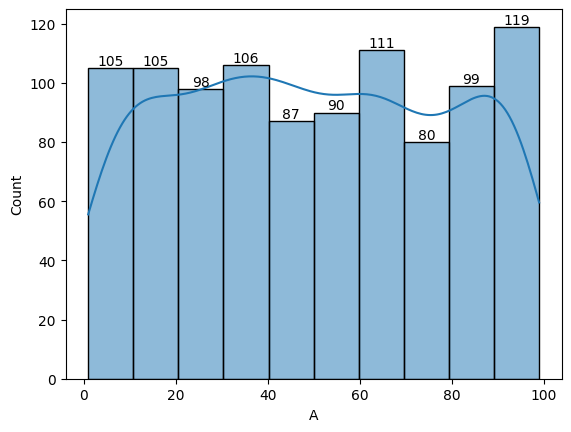

In [19]:
ax = sns.histplot(df['A'], bins=10, kde=True)
for container in ax.containers:
    ax.bar_label(container)

In [20]:
hist, bin_edges = np.histogram(df['A'], bins=10)

In [21]:
hist

array([105, 105,  98, 106,  87,  90, 111,  80,  99, 119], dtype=int64)

In [22]:
bin_edges

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [23]:
df['A'].min()

1

In [24]:
df['A'].max()

99

In [25]:
df['A CAT'] = pd.cut(df['A'], bins=bin_edges, right=False)

In [26]:
df['A CAT'].value_counts(sort=False)

A CAT
[1.0, 10.8)     105
[10.8, 20.6)    105
[20.6, 30.4)     98
[30.4, 40.2)    106
[40.2, 50.0)     87
[50.0, 59.8)     90
[59.8, 69.6)    111
[69.6, 79.4)     80
[79.4, 89.2)     99
[89.2, 99.0)    100
Name: count, dtype: int64

In [27]:
df[df['A CAT'].isna()]

,A,B,C,D,E,A CAT
index,,,,,,
2025-04-06,99,47,78,3,1,NaN
2025-05-07,99,19,48,80,3,NaN
2025-05-10,99,89,99,25,93,NaN
2025-05-30,99,50,25,24,13,NaN
2025-12-17,99,86,24,81,74,NaN
2026-07-10,99,98,33,21,81,NaN
2026-08-17,99,41,6,25,13,NaN
2026-09-07,99,60,11,63,21,NaN
2026-10-05,99,32,94,39,12,NaN


# update  table with column A CAT

In [46]:
with con:
    con.execute('''
    ALTER TABLE Moje1 ADD COLUMN 'A CAT' text 
    ''')

In [47]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-09 00:00:00', 52, 93, 15, 72, 61, None, None),
 ('2025-03-10 00:00:00', 21, 83, 87, 75, 75, None, None),
 ('2025-03-11 00:00:00', 88, 24, 3, 22, 53, None, None),
 ('2025-03-12 00:00:00', 2, 88, 30, 38, 2, None, None),
 ('2025-03-13 00:00:00', 64, 60, 21, 33, 76, None, None),
 ('2025-03-14 00:00:00', 58, 22, 89, 49, 91, None, None),
 ('2025-03-15 00:00:00', 59, 42, 92, 60, 80, None, None),
 ('2025-03-16 00:00:00', 15, 62, 62, 47, 62, None, None),
 ('2025-03-17 00:00:00', 51, 55, 64, 3, 51, None, None),
 ('2025-03-18 00:00:00', 7, 21, 73, 39, 18, None, None)]

In [48]:
update = list(zip(df.reset_index()['index'].to_list(), df.reset_index()['A CAT'].to_list()))
update[:10]

[(Timestamp('2025-03-09 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-10 00:00:00'), Interval(20.6, 30.4, closed='left')),
 (Timestamp('2025-03-11 00:00:00'), Interval(79.4, 89.2, closed='left')),
 (Timestamp('2025-03-12 00:00:00'), Interval(1.0, 10.8, closed='left')),
 (Timestamp('2025-03-13 00:00:00'), Interval(59.8, 69.6, closed='left')),
 (Timestamp('2025-03-14 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-15 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-16 00:00:00'), Interval(10.8, 20.6, closed='left')),
 (Timestamp('2025-03-17 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-18 00:00:00'), Interval(1.0, 10.8, closed='left'))]

In [53]:
update = ('bin 1', '2025-03-09 00:00:00')#, ('bin 2', '2025-03-10 00:00:00')]
with con:
    con.execute('''
    UPDATE Moje1 SET 'A CAT' = ? WHERE "index" = ? 
    ''', update)

In [101]:
with con:
    res = con.execute('select * from sqlite_master where type = "table"')
    data = res.fetchall()
data

[('table',
  'Moje1',
  'Moje1',
  2,
  'CREATE TABLE "Moje1" (\n"index" TIMESTAMP,\n  "A" INTEGER,\n  "B" INTEGER,\n  "C" INTEGER,\n  "D" INTEGER,\n  "E" INTEGER\n, \'A CAT text\', \'A CAT\' text)')]

In [55]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-09 00:00:00', 52, 93, 15, 72, 61, None, 'bin 1'),
 ('2025-03-10 00:00:00', 21, 83, 87, 75, 75, None, None),
 ('2025-03-11 00:00:00', 88, 24, 3, 22, 53, None, None),
 ('2025-03-12 00:00:00', 2, 88, 30, 38, 2, None, None),
 ('2025-03-13 00:00:00', 64, 60, 21, 33, 76, None, None),
 ('2025-03-14 00:00:00', 58, 22, 89, 49, 91, None, None),
 ('2025-03-15 00:00:00', 59, 42, 92, 60, 80, None, None),
 ('2025-03-16 00:00:00', 15, 62, 62, 47, 62, None, None),
 ('2025-03-17 00:00:00', 51, 55, 64, 3, 51, None, None),
 ('2025-03-18 00:00:00', 7, 21, 73, 39, 18, None, None)]

In [57]:
update = [('bin 1', '2025-03-09 00:00:00'), ('bin 2', '2025-03-10 00:00:00')]
with con:
    con.executemany('''
    UPDATE Moje1 SET 'A CAT' = ? WHERE "index" = ? 
    ''', update)

In [58]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-09 00:00:00', 52, 93, 15, 72, 61, None, 'bin 1'),
 ('2025-03-10 00:00:00', 21, 83, 87, 75, 75, None, 'bin 2'),
 ('2025-03-11 00:00:00', 88, 24, 3, 22, 53, None, None),
 ('2025-03-12 00:00:00', 2, 88, 30, 38, 2, None, None),
 ('2025-03-13 00:00:00', 64, 60, 21, 33, 76, None, None),
 ('2025-03-14 00:00:00', 58, 22, 89, 49, 91, None, None),
 ('2025-03-15 00:00:00', 59, 42, 92, 60, 80, None, None),
 ('2025-03-16 00:00:00', 15, 62, 62, 47, 62, None, None),
 ('2025-03-17 00:00:00', 51, 55, 64, 3, 51, None, None),
 ('2025-03-18 00:00:00', 7, 21, 73, 39, 18, None, None)]

In [98]:
update = list(zip( ['bin1' for i in range(1000)] , (df.reset_index()['index'].astype(str) + ' 00:00:00').to_list() ))#df.reset_index()['A CAT'].to_list()))
update[:10]

[('bin1', '2025-03-09 00:00:00'),
 ('bin1', '2025-03-10 00:00:00'),
 ('bin1', '2025-03-11 00:00:00'),
 ('bin1', '2025-03-12 00:00:00'),
 ('bin1', '2025-03-13 00:00:00'),
 ('bin1', '2025-03-14 00:00:00'),
 ('bin1', '2025-03-15 00:00:00'),
 ('bin1', '2025-03-16 00:00:00'),
 ('bin1', '2025-03-17 00:00:00'),
 ('bin1', '2025-03-18 00:00:00')]

In [99]:
with con:
    con.executemany('''
    UPDATE Moje1 SET 'A CAT' = ? WHERE "index" = ? 
    ''', update)

In [100]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-09 00:00:00', 52, 93, 15, 72, 61, None, 'bin1'),
 ('2025-03-10 00:00:00', 21, 83, 87, 75, 75, None, 'bin1'),
 ('2025-03-11 00:00:00', 88, 24, 3, 22, 53, None, 'bin1'),
 ('2025-03-12 00:00:00', 2, 88, 30, 38, 2, None, 'bin1'),
 ('2025-03-13 00:00:00', 64, 60, 21, 33, 76, None, 'bin1'),
 ('2025-03-14 00:00:00', 58, 22, 89, 49, 91, None, 'bin1'),
 ('2025-03-15 00:00:00', 59, 42, 92, 60, 80, None, 'bin1'),
 ('2025-03-16 00:00:00', 15, 62, 62, 47, 62, None, 'bin1'),
 ('2025-03-17 00:00:00', 51, 55, 64, 3, 51, None, 'bin1'),
 ('2025-03-18 00:00:00', 7, 21, 73, 39, 18, None, 'bin1')]

In [102]:
with con:
    res = con.execute('select * from sqlite_master where type = "table"')
    data = res.fetchall()
data

[('table',
  'Moje1',
  'Moje1',
  2,
  'CREATE TABLE "Moje1" (\n"index" TIMESTAMP,\n  "A" INTEGER,\n  "B" INTEGER,\n  "C" INTEGER,\n  "D" INTEGER,\n  "E" INTEGER\n, \'A CAT text\', \'A CAT\' text)')]